In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris=load_iris()
dataset=iris.data
dataset[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
x=iris.feature_names
y=iris.target_names
print("Independent Columns : ",x)
print("Dependent Columns : ",y)

Independent Columns :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dependent Columns :  ['setosa' 'versicolor' 'virginica']


# Linear Regression

***Converting the iris into Pandas DataFrame***

In [4]:
df=pd.DataFrame(data=dataset,columns=x)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


***Describes correlation b/w columns***

**Represents how change in one variable effects another variable. If Correlation is 1 or near to 1 then it is strong & vice versa.**

In [5]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


***Conclusion :*** The above analyse shows that the correlation b/w petal width (x) & petal length (y) is strong (0.96)

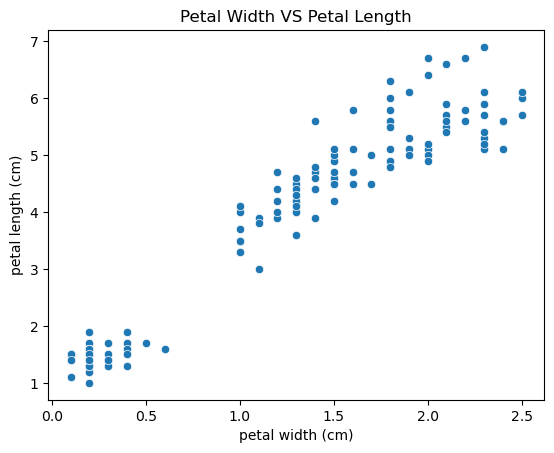

In [6]:
sns.scatterplot(x="petal width (cm)",y="petal length (cm)",data=df)
plt.title("Petal Width VS Petal Length")
plt.show()

# Pre_Processing for model training

***Sklearn expects the inputs to be in 2D Array form***

In [32]:
from sklearn.model_selection import train_test_split # importing model which splits data into test & train parts
x=df[["petal length (cm)"]] # features are always given as 2D array
y=df["petal width (cm)"]

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1)

# Training the model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)
print(reg.intercept_)
print(reg.coef_)

-0.33608543835648796
[0.40618758]


# Prediction

***Predicting for random value***

In [36]:
petal_length=reg.predict([[7.5]])
print("Predicted Value : ",petal_length)

Predicted Value :  [2.71032141]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Prediction manually

In [37]:
def calc(slope,intercept,x):
    return x*slope+intercept

In [38]:
value=calc(reg.coef_,reg.intercept_,7.5)
print(value)

[2.71032141]


# Now giving the testing data to the model

In [42]:
xtest

,petal length (cm)
31,1.5
79,3.5
10,1.5
109,6.1
62,4.0
94,4.2
32,1.5
25,1.6
144,5.7
97,4.3


In [46]:
y_pred=reg.predict(xtest)
df_pred=pd.DataFrame({"Actual Value ":ytest.values,"Predicted Value ":y_pred}) #squeeze() will give value of each cell
df_pred

,Actual Value,Predicted Value
0,0.4,0.273196
1,1.0,1.085571
2,0.2,0.273196
3,2.5,2.141659
4,1.0,1.288665
5,1.3,1.369902
6,0.1,0.273196
7,0.2,0.313815
8,2.5,1.979184
9,1.3,1.410521


# Evaluating model

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse = mean_squared_error(ytest,y_pred) # A lower Mean Square Error (MSE) indicates better accuracy.
mae = mean_absolute_error(ytest,y_pred) # neglects sign of mean of error. Only meant with the absolute value
rmse = np.sqrt(mse) # Root Mean Square Error give value in same unit

print("Mean Absolute Error : ",mae)
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)

Mean Absolute Error :  0.21164060855311254
Mean Squared Error :  0.0700922187632882
Root Mean Squared Error :  0.26474935082694384


# Canada's per capita income in year 2020

In [38]:
df=pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


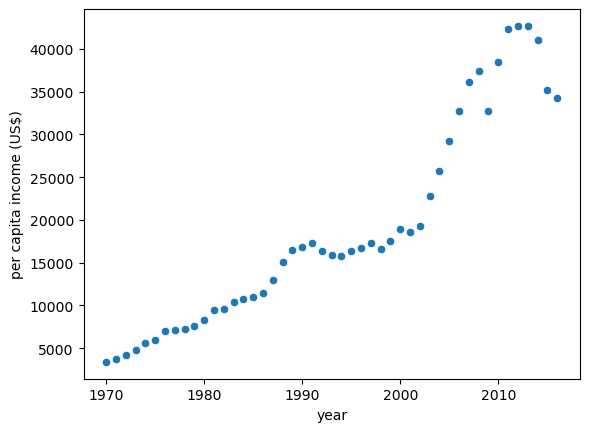

In [39]:
sns.scatterplot(x="year",y="per capita income (US$)",data=df)
plt.show()

In [40]:
x=df[["year"]]
y=df["per capita income (US$)"]

In [41]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.10)

In [42]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [43]:
ypred=model.predict(xtest)
ypred

array([ 2178.49162986,  3000.11341216, 15324.44014669, 13681.19658208,
       33400.11935733])

In [45]:
res=pd.DataFrame({"Actual Value":ytest,"Predicted Value":ypred})
res

,Actual Value,Predicted Value
3,4804.463248,2178.491630
4,5576.514583,3000.113412
19,16426.725480,15324.440147
17,12974.806620,13681.196582
41,42334.711210,33400.119357


In [46]:
from sklearn.metrics import r2_score

In [47]:
accuracy=r2_score(ytest,ypred)
print(f"Accuracy is {int(accuracy*100)}%.")

Accuracy is 89%.


***Now, using this build a regression model and predict the per capita income fo canadian citizens in year 2020.***

In [48]:
ypred=model.predict([[2020]])
ypred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40794.71539805])